### Importing Library

In [209]:
from io import BytesIO
from IPython.display import Image
import PIL.Image

import re

In [210]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

### Input Output Methods

In [211]:
def show(img):
    cv.imshow("", img)    
    cv.waitKey()           
    cv.destroyAllWindows()
def plt_disp(img):
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()
def disp(a, fmt='jpeg'):
    a = cv.cvtColor(a,cv.COLOR_BGR2RGB)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

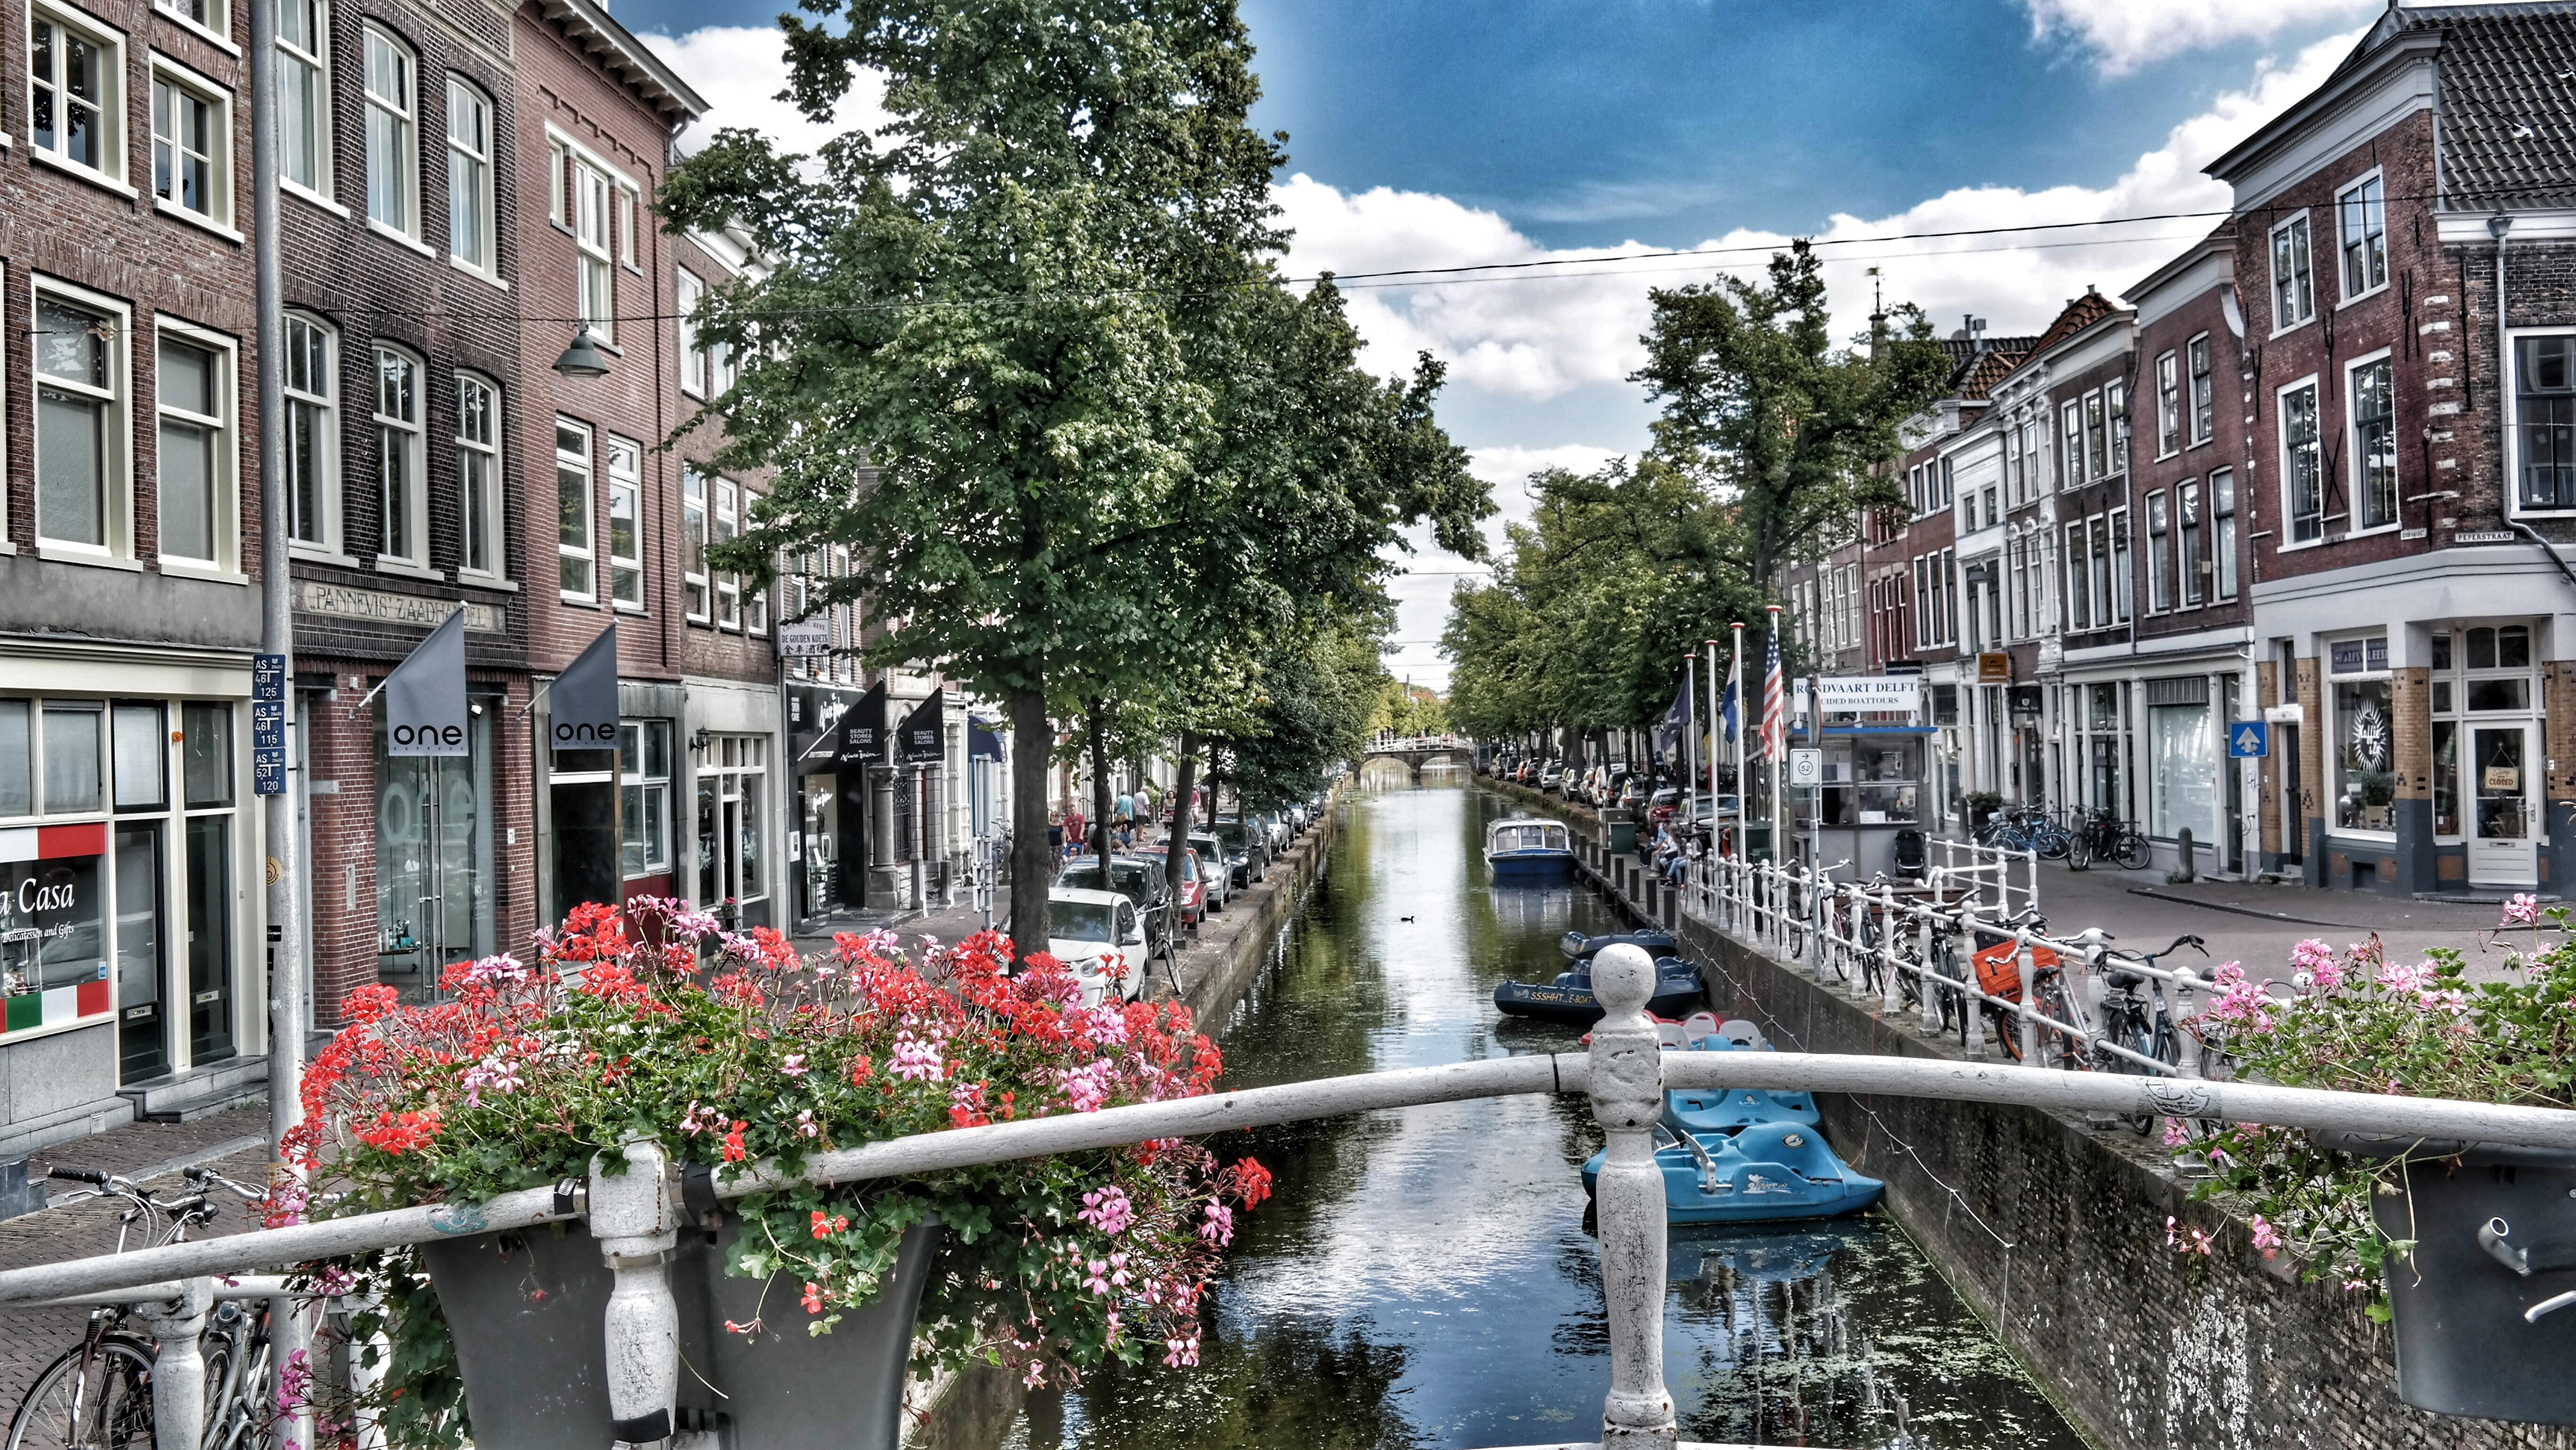

In [212]:
img = cv.imread('../images/image4.jpg')
disp(img)

In [213]:
# Capture image
cap = cv.VideoCapture(0)
if (cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        cv.imshow("NAME", frame)            
        cv.waitKey()
        cv.imwrite("img2.jpg",frame)
cap.release()
cv.destroyAllWindows()

In [214]:
# image Resize 
img = frame[100:400,130:330]

In [215]:
a = 20

In [216]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j,0]<200 and img[i,j,1]<230 and img[i,j,2]<200:
            img[i,j]+=a
        

In [217]:
show(img)


## Image Operartions 

#### Arithmetic Operator
* ``` cv2.addWeighted(img1,coef1,img2,coef2,coef3) ```\; $y = c_1x_1+c_2x_2+c_3$
* ``` cv2.subtract(img1,img2) ``` $y=x_1-x_2$

#### Bitwise Operator
* ``` cv2.bitwise_and(img1, img2, mask= None) ```
* ``` cv2.bitwise_or(img1, img2, mask= None) ```
* ``` cv2.bitwise_xor(img1, img2, mask= None) ```
* ``` cv2.bitwise_not(img1, mask= None) ```

In [307]:
help(cv.bitwise_not )

Help on built-in function bitwise_not:

bitwise_not(...)
    bitwise_not(src[, dst[, mask]]) -> dst
    .   @brief  Inverts every bit of an array.
    .   
    .   The function cv::bitwise_not calculates per-element bit-wise inversion of the input
    .   array:
    .   \f[\texttt{dst} (I) =  \neg \texttt{src} (I)\f]
    .   In case of a floating-point input array, its machine-specific bit
    .   representation (usually IEEE754-compliant) is used for the operation. In
    .   case of multi-channel arrays, each channel is processed independently.
    .   @param src input array.
    .   @param dst output array that has the same size and type as the input
    .   array.
    .   @param mask optional operation mask, 8-bit single channel array, that
    .   specifies elements of the output array to be changed.



## Image Enhancement in Spatial Domain

In [218]:
img =  cv.resize(cv.imread('../images/image2.jpg'),(480,300), cv.INTER_CUBIC)
display(img.shape)
disp(img)

(300, 480, 3)

#### Contrast Straching 

$$\hat{I}(x,y)= \left( \frac{(I(x,y)-min_{i,j}I(i,j))(I_{MAX}-I_{MIN})}{max_{i,j}I(i,j)-min_{i,j}I(i,j)}\right)+I_{MIN}$$
$$\hat{I}(x,y)= \left( \frac{I(x,y)-min_{i,j}I(i,j)}{max_{i,j}I(i,j)-min_{i,j}I(i,j)}\right)\times 255$$

In [219]:
def stratch_contrast(img:np.ndarray)->np.ndarray :     
    if len(img.shape) == 3:
        b = img[:,:,0]
        g = img[:,:,1]
        r = img[:,:,2]
        nb = np.array(((b-b.min())/(b.max()-b.min()))*255, dtype=np.uint8)
        ng = np.array(((g-g.min())/(g.max()-g.min()))*255, dtype=np.uint8)
        nr = np.array(((r-r.min())/(r.max()-r.min()))*255, dtype=np.uint8)
        return np.dstack((nb,ng,nr)) 
    else :        
        return np.array(((img-img.min())/(img.max()-img.min()))*255, dtype=np.uint8)   

In [220]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
strached_img = stratch_contrast(img)
show(img_gray)
show(strached_img)


### Thresolding

Thresold is done by ```cv.thresold(img, thresold_value, MAX_IMG_VAL,Thresold_type )```

In [221]:
## Types of Thresold
for i in dir(cv):
    if re.match("THRESH.*", i):
        print("cv2."+i)

cv2.THRESH_BINARY
cv2.THRESH_BINARY_INV
cv2.THRESH_MASK
cv2.THRESH_OTSU
cv2.THRESH_TOZERO
cv2.THRESH_TOZERO_INV
cv2.THRESH_TRIANGLE
cv2.THRESH_TRUNC


In [222]:
_,thresh1 = cv.threshold(img_gray,127,255,cv.THRESH_BINARY)
_,thresh2 = cv.threshold(img_gray,127,255,cv.THRESH_OTSU)
_,thresh3 = cv.threshold(img_gray,127,255,cv.THRESH_TRUNC)
_,thresh4 = cv.threshold(img_gray,127,255,cv.THRESH_TOZERO)
_,thresh5 = cv.threshold(img_gray,127,255,cv.THRESH_TRIANGLE)
titles = ['Original Image','BINARY','OTSU','TRUNC','TOZERO','TRIANGLE']
images = [img_gray, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Adaptive Thresolding 

In [223]:
for i in dir(cv):
    if re.match("ADAPTIVE.*", i):
        print("cv2."+i)

cv2.ADAPTIVE_THRESH_GAUSSIAN_C
cv2.ADAPTIVE_THRESH_MEAN_C


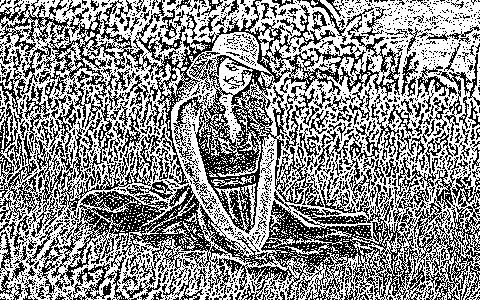

In [224]:
disp(cv.adaptiveThreshold(img_gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,7,1))

## Image Enhancement in Frequency Domain 

#### One Dimentional Fourier Transformation 

let a function $g(u)$ the the *fourier transformation* is $\mathscr{F}(g) = G$
$$ \mathscr{F}\{g(x)\} = G(u) = \int\limits_{-\infty}^{\infty}g(x)e^{-j.2\pi ux} dx$$
Inverse Fourier Transformation is given by $\mathscr{F}^{-1}(G) = g$
$$ \mathscr{F^{-1}}\{G(u)\} = g(x) = \int\limits_{-\infty}^{\infty}G(u)e^{j.2\pi ux} du$$

#### Two Dimentional Fourier Transformation 

let a function $g(u)$ the the *fourier transformation* is 
$$ \mathscr{F}\{g(x,y)\} = G(u,v) = \iint\limits_{-\infty}^{\infty}g(x)e^{-j.2\pi (ux+vy)} dx dy$$


$$ \mathscr{F^{-1}}\{G(u,v)\} = g(x,y) = \iint\limits_{-\infty}^{\infty}G(u)e^{j.2\pi (ux+vy)} dudv$$


#### One Dimentional Discrete Fourier Transform (1D-DFT)

#### Two Dimentional Discrete Fourier Transform (1D-DFT)

## Histogram 

In [294]:
def  plt_img_with_hist(img):
    fig = plt.figure(figsize=(15,18))
    ax1 = plt.subplot2grid((3, 2), (0, 0),colspan=1)
    ax2 = plt.subplot2grid((3, 2), (0, 1), colspan=1)
    if len(img.shape)<3:
        ax1.imshow(img, cmap='gray')
        ax2.hist(img.ravel(),bins = 256, range = [0, 256],color = 'purple')
               
    else :    
        ax1.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))    
        for i,col in enumerate(('b','g','r')):
            histr = cv.calcHist([img],[i],None,[256],[0,256])
            ax2.plot(histr,color = col)
            # ax2.xlim([0,256])  
    ax2.locator_params(nbins=20)           
    plt.show()

In [295]:
img = cv.resize(cv.imread('../images/image2.jpg'),(960,600))
plt_img_with_hist(img)

Brightness = $\frac{1}{mn} \sum\limits_{i=1}^{m}\sum\limits_{j=1}^{n} I(i,j)$

In [296]:
brightness = img.sum()/img.size
brightness

148.39896006944446

### Histogram Equlization

In [297]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Ploting 
plt_img_with_hist(img_gray)

In [298]:
hist_equ_img_gray = cv.equalizeHist(img_gray)
# Ploting 
plt_img_with_hist(hist_equ_img_gray)

### Histogram Equlization on Colour Image

In [301]:
b = img[:,:,0];g = img[:,:,1];r = img[:,:,2]
eq_b = cv.equalizeHist(b)
eq_g = cv.equalizeHist(g)
eq_r = cv.equalizeHist(r)
eq_img = np.dstack((eq_b,eq_g,eq_r))
plt_img_with_hist(eq_img)

## Colour Space 

#### Colour Model

##### RGB       : RED-GREEN-BLUE
1. 3 colour value  for three colour chanel 
2. (0,0,0) represent the Black colour 
3. (Max, Max, Max) Represent White
4. It is standard colour to represent maximum colour space 

##### NTSC      : National Television System Committee
* represented by (Y, I, Q)  3 colour chenel 
$$\begin{bmatrix}R\\G\\B\end{bmatrix} =
 \begin{bmatrix}1&0.956&0.621\\1&-0.272&-0.647\\1&-0.106&1.703\end{bmatrix} 
\begin{bmatrix}Y\\I\\Q\end{bmatrix}$$

##### YCbCr     : digial video color space. Y-> Green, Cb -> Blue, Cr -> Red
$$\begin{bmatrix}Y\\C_b\\C_r\end{bmatrix} =
\begin{bmatrix}16\\128\\128\end{bmatrix} +
 \begin{bmatrix}65.481&128.553&24.966\\-37.799&-074.203&112.00\\112.00&-93.786&-18.214\end{bmatrix} 
\begin{bmatrix}Y\\I\\Q\end{bmatrix}$$0

##### CMY/CMYK  : Cyan Megenta Yellow Key
$$\begin{bmatrix}C\\M\\Y\end{bmatrix}=
 MAX\begin{bmatrix}1\\1\\1\end{bmatrix} -
\begin{bmatrix}R\\G\\B\end{bmatrix} $$
* K is the representation of Black colour

##### HSI       : Hue Satuaration Intensity
##### HSV       : Hue Satuaration Value
##### Lab       : Luminence a ,b


In [32]:
## Types of Colour space converter 
for i in dir(cv):
    if re.match("COLOR_.*", i):
        print("cv2."+i)

cv2.COLOR_BAYER_BG2BGR
cv2.COLOR_BAYER_BG2BGRA
cv2.COLOR_BAYER_BG2BGR_EA
cv2.COLOR_BAYER_BG2BGR_VNG
cv2.COLOR_BAYER_BG2GRAY
cv2.COLOR_BAYER_BG2RGB
cv2.COLOR_BAYER_BG2RGBA
cv2.COLOR_BAYER_BG2RGB_EA
cv2.COLOR_BAYER_BG2RGB_VNG
cv2.COLOR_BAYER_BGGR2BGR
cv2.COLOR_BAYER_BGGR2BGRA
cv2.COLOR_BAYER_BGGR2BGR_EA
cv2.COLOR_BAYER_BGGR2BGR_VNG
cv2.COLOR_BAYER_BGGR2GRAY
cv2.COLOR_BAYER_BGGR2RGB
cv2.COLOR_BAYER_BGGR2RGBA
cv2.COLOR_BAYER_BGGR2RGB_EA
cv2.COLOR_BAYER_BGGR2RGB_VNG
cv2.COLOR_BAYER_GB2BGR
cv2.COLOR_BAYER_GB2BGRA
cv2.COLOR_BAYER_GB2BGR_EA
cv2.COLOR_BAYER_GB2BGR_VNG
cv2.COLOR_BAYER_GB2GRAY
cv2.COLOR_BAYER_GB2RGB
cv2.COLOR_BAYER_GB2RGBA
cv2.COLOR_BAYER_GB2RGB_EA
cv2.COLOR_BAYER_GB2RGB_VNG
cv2.COLOR_BAYER_GBRG2BGR
cv2.COLOR_BAYER_GBRG2BGRA
cv2.COLOR_BAYER_GBRG2BGR_EA
cv2.COLOR_BAYER_GBRG2BGR_VNG
cv2.COLOR_BAYER_GBRG2GRAY
cv2.COLOR_BAYER_GBRG2RGB
cv2.COLOR_BAYER_GBRG2RGBA
cv2.COLOR_BAYER_GBRG2RGB_EA
cv2.COLOR_BAYER_GBRG2RGB_VNG
cv2.COLOR_BAYER_GR2BGR
cv2.COLOR_BAYER_GR2BGRA
cv2.COLOR_BAYER_GR2BG

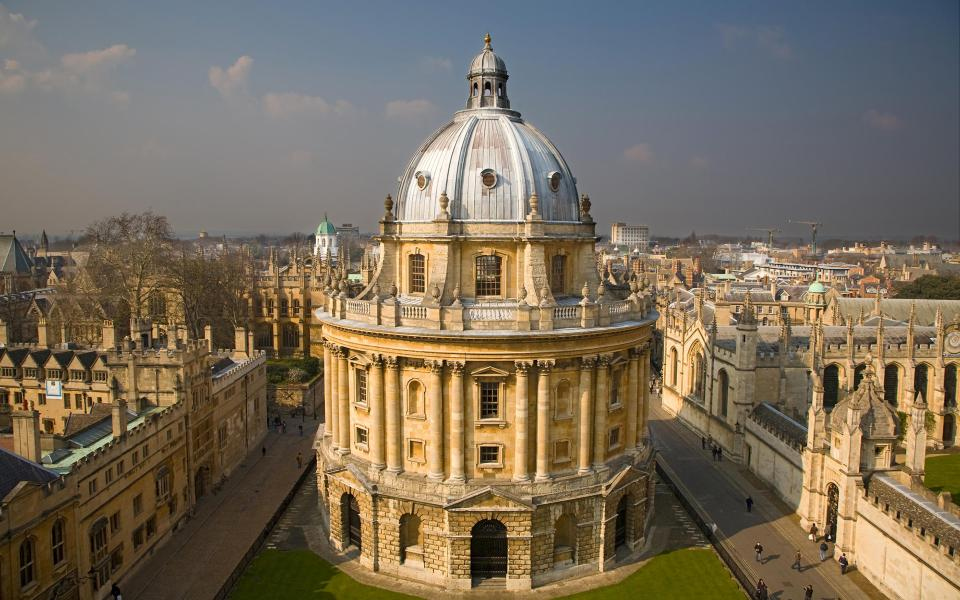

In [71]:
img = cv.resize(cv.imread("../images/image5.jpg"),(960,600))
# img = cv.imread("../images/image1.jpg")
disp(img)

In [72]:
img_hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)

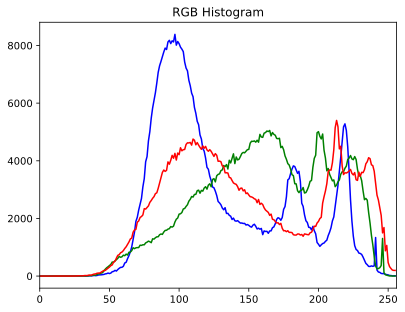

In [165]:
hist_graph_b = cv.calcHist([img],[0],None,[256],[0,256])
hist_graph_g = cv.calcHist([img],[1],None,[256],[0,256])
hist_graph_r = cv.calcHist([img],[2],None,[256],[0,256])
plt.plot(hist_graph_b,color = 'b')
plt.xlim([0,256])
plt.plot(hist_graph_g,color = 'g')
plt.xlim([0,256])
plt.plot(hist_graph_r,color = 'r')
plt.xlim([0,256])
plt.title("RGB Histogram")
plt.show()

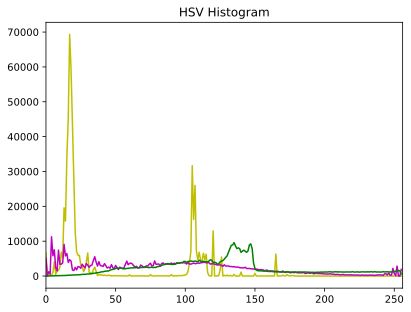

In [74]:
hist_graph_b = cv.calcHist([img_hsv],[0],None,[256],[0,256])
hist_graph_g = cv.calcHist([img_hsv],[1],None,[256],[0,256])
hist_graph_r = cv.calcHist([img_hsv],[2],None,[256],[0,256])
plt.plot(hist_graph_b,color = 'y')
plt.xlim([0,256])
plt.plot(hist_graph_g,color = 'm')
plt.xlim([0,256])
plt.plot(hist_graph_r,color = 'g')
plt.xlim([0,256])
# plt.hist(img.ravel(),bins=256,range=[0,256])
plt.title("HSV Histogram")
plt.show()

## Morphological Image Processing

## Geometrical Transformation

#### Scaling Image

In [162]:
img = cv.imread('../images/image5.jpg')
img.shape

(1200, 1920, 3)

In [163]:
# Resizing Image
img = cv.resize(img,(600,960),interpolation=cv.INTER_CUBIC)

disp(img)

In [7]:
import re
for i in dir(cv):
    if re.match("INTER_.*", i):
        print("cv2."+i)

cv2.INTER_AREA
cv2.INTER_BITS
cv2.INTER_BITS2
cv2.INTER_CUBIC
cv2.INTER_LANCZOS4
cv2.INTER_LINEAR
cv2.INTER_LINEAR_EXACT
cv2.INTER_MAX
cv2.INTER_NEAREST
cv2.INTER_NEAREST_EXACT
cv2.INTER_TAB_SIZE
cv2.INTER_TAB_SIZE2


#### Translation 

Shifting of an object location 
Translation Matrix is 
$$ M = \begin{bmatrix} 
I_2 & T \end{bmatrix}
=\begin{bmatrix} 
1&0 & t_x\\
0&1& t_y
    \end{bmatrix}
$$

Translation operation is performed by ``` cv.wrapAffine```function

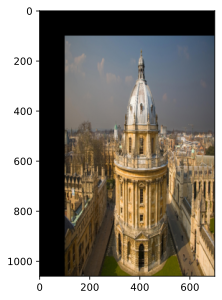

In [9]:
# img = cv.imread('img.jpg',cv.IMREAD_UNCHANGED)
rows,cols,_ = img.shape
M = np.matrix(
    '''1, 0, 100;
       0, 1, 100
    ''',dtype=np.float32)

translated_img = cv.warpAffine(img,M,(cols+100,rows+100))
disp(translated_img )

#### Rotatin 

Rotation of an image for an angle θ is achieved by the transformation matrix of the form
$$ R = \begin{bmatrix} 
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta\\
\end{bmatrix}
$$
```getRotationMatrix2D(center, angle, scale)``` function give the rotation matrix

In [10]:
center=np.array([img.shape[0],img.shape[1]])/2
R = cv.getRotationMatrix2D(center,40,1)

In [11]:
transformed_img = cv.warpAffine(img, R,(1000,1000))

In [12]:
show(transformed_img)

QApplication: invalid style override 'kvantum' passed, ignoring it.
	Available styles: Windows, Fusion


#### Affine Transform

```getAffineTransform(point_set_1,point_set_2)``` gives the matrix 

In [14]:
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols*2,rows*2))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

#### Perspective Transfoem

In [17]:
img.shape

(960, 600, 3)

In [20]:
rows,cols,ch = img.shape
pts1 = np.float32([[40,40],[40,550],[40,900],[560,900]])
pts2 = np.float32([[0,0],[900,0],[0,600],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## Image Filtering  

In [ ]:
img = cv.resize(cv.imread('../images/image5.jpg'),(300,480))
disp(img)

### High Pass Filter 
* Use to edge detect , blob detect etc 

#### Convolution 2D filters 
* general filter : ```cv.filter2D(img, ddepth, kernel_matrix, anchore_point,border_type )```

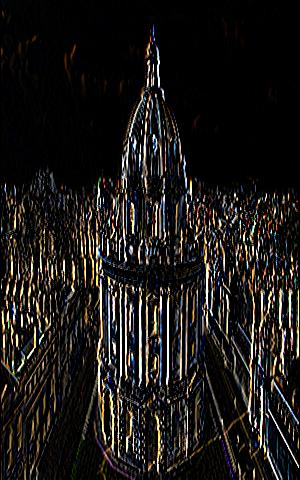

In [172]:
# let define kernel 
v_edge_kernel = np.matrix('''-1, 0, 1;
                             -1, 0, 1;
                             -1, 0, 1''')
# transform image
transformed_img = cv.filter2D(src = img, ddepth = -1, kernel = v_edge_kernel)
disp(transformed_img)


In [174]:
# let define kernel 
h_edge_kernel = np.matrix('''-1, -1, -1;
                              0,  0,  0;
                              1,  1,  1''')
# transform image
transformed_img = cv.filter2D(src = img, ddepth = -1, kernel = h_edge_kernel)
disp(transformed_img)

### Low Pass Filter 
* use to smoothing an image 

* Box filter : ```cv.blur(img. filter_shape)```
* Gausian Filter : ```cv.GaussianBlur(img,filter_shape,sigma_X,sigma_Y=sigma_X)```
* Median Filter : ```cv.medianBlur(img, filter_shape)```
* Bilateral Filter : ```cv.bilateralFilter(img,9,75,75)```

In [175]:
transformed_img = cv.GaussianBlur(img, (5,5),1,2)
disp(transformed_img)
transformed_img= cv.bilateralFilter(img,9,50,75)
disp(transformed_img)

## Edge Detection

#### Edge Detection Filter 

* Sobel Edge Filters
    * sobel X   
    * sobel Y
* Scharr Edge Filter 
* Laplacian Filter
* canny Edge detection

sobel V $=\begin{bmatrix}-1&0&1\\-2&0&-2\\-1&0&1 \end{bmatrix}$ sobel H $=\begin{bmatrix}-1&-2&-1\\0&0&0\\1&2&1 \end{bmatrix}$ 

Scharr V $=\begin{bmatrix}-3&0&3\\-10&0&10\\-3&0&3 \end{bmatrix}$ Scharr H $=\begin{bmatrix}-3&-10&-3\\0&0&0\\3&10&3 \end{bmatrix}$ 


### OpenCV functions 

```cv.filter2D``` is general purpus filter function in in edge detection we use special define function as 
* ```cv.Sobel(img, depth, dx,dy)```
* ```cv.Scharr(img, depth, dx,dy)```
* ```cv.Laplacian(img, depth, kernel_size)```

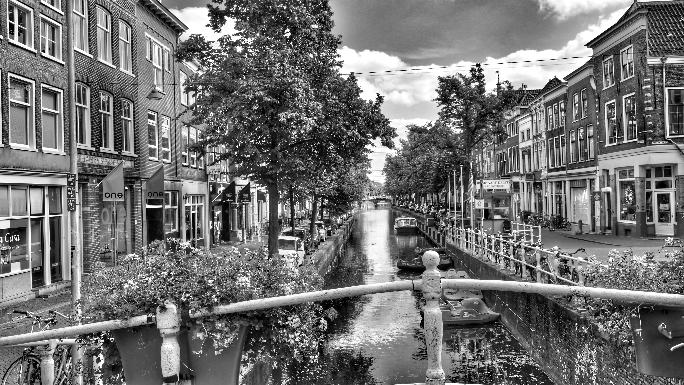

In [210]:
img =cv.cvtColor(cv.resize(cv.imread('../images/image4.jpg'),(684,385)), cv.COLOR_BGR2GRAY)
img.shape
disp(img)

In [211]:
img_grid =cv.hconcat(( cv.Sobel(img,-1,0,1),cv.Scharr(img,-1,0,1)))
disp(img_grid)

Let it be smooth

In [216]:
smooth_img = cv.bilateralFilter(img,7,50,175)
img_grid =cv.hconcat(( cv.Sobel(smooth_img,-1,0,1),cv.Scharr(smooth_img,-1,0,1)))
disp(img_grid)

##### Laplacian Edge

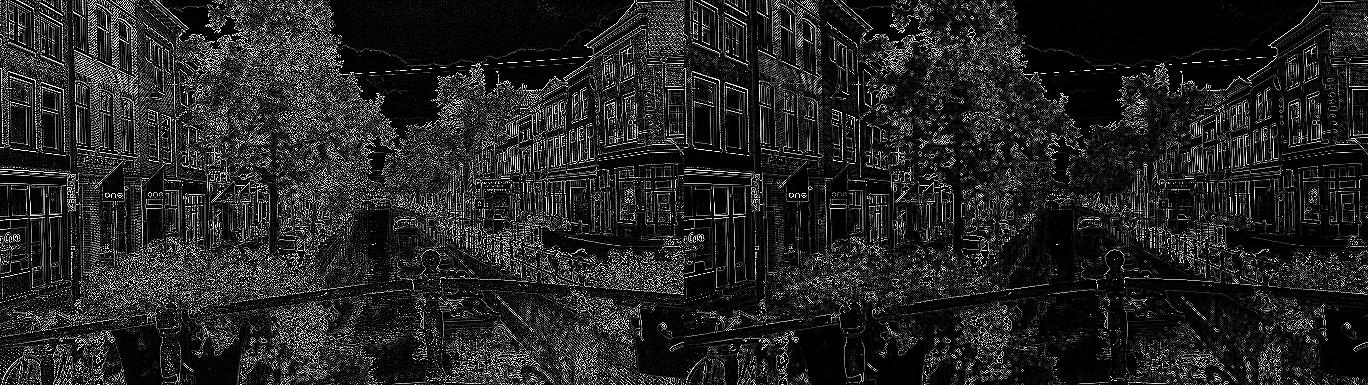

In [217]:
smooth_img = cv.bilateralFilter(img,5,50,75)
img_grid = cv.hconcat((cv.Laplacian(img,-1,3),cv.Laplacian(smooth_img,-1,3)))
disp(img_grid)


### Canny Edge detection

* Methods 
    1. Noice Reduction 
    2. Gradient Calculation 
    3. Non-Maximum Suppression
    4. Double Thresolding 
    5. Edge Tracking by Histeresis

### Edges detection by Fourier Transformation

## Contour Detection